In [2]:
#Python 3 environment

#Please forgive the excess of comments. I hope that there are enough that
#even if you have never seen a python script before, you can follow along...

#First up, I'll import some packages that don't get auto-loaded when you open python.
#These will be used to do data cleaning, visualizing, etc.

#I'm not sure I'll need all of these, but I tend to use them.
#So I'll go ahead and import them now.
#I like my plots to auto-appear, like in Mathematica. This does that.
%matplotlib inline
import pandas as pd #pandas is a useful array/matrix/spreadsheet maipulator. But it has some unique language
import numpy as np #math stuff!
#import pylab as P #I actually don't use pylab very much...
#from operator import itemgetter, attrgetter, methodcaller #Why do I have this..?
import matplotlib.pyplot as plt #plotting package.
from sklearn.ensemble import RandomForestClassifier #machine learning package.

import os
mingw_path='C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH']=mingw_path+';'+os.environ['PATH']
import xgboost as xgb


#Below, checking to make sure train and test csv files are available to open

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 7A48-729A

 Directory of C:\Users\KLK\Kaggle Codes\Titanic

06/21/2016  07:08 AM    <DIR>          .
06/21/2016  07:08 AM    <DIR>          ..
05/13/2016  11:17 AM    <DIR>          .ipynb_checkpoints
05/12/2016  03:20 PM            28,629 test.csv
06/21/2016  07:08 AM           162,211 Titanic.ipynb
05/13/2016  02:55 PM             3,258 titanic_predictions.csv
05/12/2016  03:20 PM            61,194 train.csv
               4 File(s)        255,292 bytes
               3 Dir(s)  226,069,999,616 bytes free


In [4]:
#Importing the training data into pandas, which makes nice spreadsheets and is good for mainpulation of rows/columns
SA_train=pd.read_csv('train.csv', header=0)

In [5]:
#Basic information about the columns in the panda object. Could also use SA_train.columns.values, but wouldn't get type info
SA_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#Just another way to summarize all the information in Pandas. 
SA_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#And a third way of looking at data. Important bit here: several features have missing values.
SA_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
#So, we see a couple categories missing ages, cabin, embarked, etc. 
#Let's first look at Age:

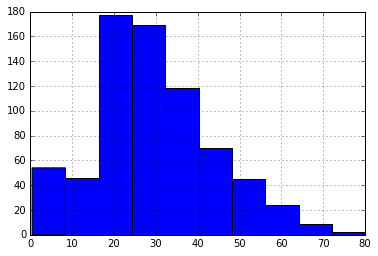

In [7]:
#This is my favorite way of calling a particular column. Could also do SA_train.Age, 
#But [] method is easier to expand to multiple columns and/or create new columns
#And might as well look at it in histogram form.
SA_train['Age'].hist()

In [8]:
#What's the average age?
SA_train['Age'].mean()

29.69911764705882

In [9]:
#Why don't we fill in the missing ages. But we don't want to corrupt original data, so first make new column
SA_train['Age_Complete']=SA_train['Age'];
#And then fill all the empty rows with 30:
SA_train['Age_Complete'].fillna(30,inplace = True);

In [11]:
#Un-comment below to check if it worked
#SA_train.head(10) #head give the top x rows of the dataset.

In [10]:
#Similiar Problem with Embarked:
pd.value_counts(SA_train['Embarked']) #A nice auto-count of unique terms in a column

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
#S is the most common, so let's make a new column and replace N/A with S:
SA_train['Embarked_Complete']=SA_train['Embarked'];
SA_train['Embarked_Complete'].fillna('S', inplace = True);

In [12]:
#Different way to check:
pd.value_counts(SA_train['Embarked_Complete']) #A nice auto-count of unique terms in a column

S    646
C    168
Q     77
Name: Embarked_Complete, dtype: int64

In [13]:
#Finally, we have the Cabin column: (Un-comment to see)
#pd.value_counts(SA_train['Cabin'])

In [13]:
#It looks pretty useless. If we look at outcomes cut by Cabin not being N/A:
SA_train['Cabin?']=SA_train['Cabin'];
SA_train['Cabin?'].fillna('No', inplace = True);

In [16]:
print( pd.value_counts(SA_train[SA_train['Cabin?']=='No']['Survived']))
print( pd.value_counts(SA_train[SA_train['Cabin?']!='No']['Survived']))

0    481
1    206
Name: Survived, dtype: int64
1    136
0     68
Name: Survived, dtype: int64


In [36]:
#Oh look, turns out having an assigned cabin is very good towards one's health.

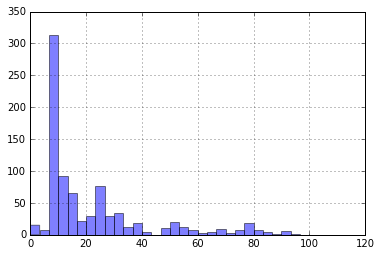

In [14]:
#I'll keep making new columns to cut my data into features. Next up, Fare
SA_train['Fare'].hist(bins=30, range=(0,100), alpha = .5) #There are fares >$100, but few.

In [15]:
#We can also see that the average fare of those that survived is higher than those that did not:
print (SA_train[SA_train['Survived']==1]['Fare'].mean())
print (SA_train[SA_train['Survived']==0]['Fare'].mean())

48.39540760233917
22.117886885245877


In [ ]:
#But how should we bin the fares together? Right now there are so many, we would overfit our data.
#Let's take a look at the survival rate of groups of fares, binned into some smallish grouping (say $5)

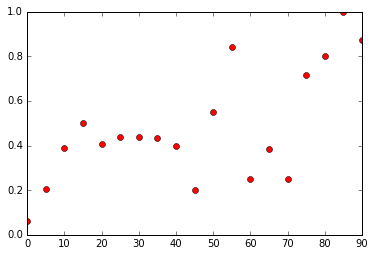

In [16]:
survival_rate=[]; #where I'll store survival rates for each dollar grouping
dollar_bins=[]; #where I'll store the dollar groupings
n=5; #Chosen dollar groupings
for xx in range(0,20): #I'm only looking up to $100 dollar fare cost, and assume everyone above that is rich.
    #OK, inefficient for loops instead of anything vectorized.
    #But, it's easier to see what's going on.
    y=0;
    z=0;
    #Counting how many people survived in fare group (y) compared to total polution in fare group (z)
    for x in range(0,len(SA_train)):
        if SA_train['Fare'][x]>=n*xx and SA_train['Fare'][x]<n*(xx+1):
            if SA_train['Survived'][x]==1:
                y=y+1
            z=z+1
    try:
        survival_rate.append(y/z);
        dollar_bins.append(n*xx);
    except:
        pass
plt.plot(dollar_bins,survival_rate,'ro')

In [17]:
#So, it looks like we could divide by 10 and 50 if we liked:
#just double checking the divides are well placed.
test=pd.value_counts(SA_train[SA_train['Fare']<10]['Survived'])
test[1]/(test[0]+test[1])

0.19940476190476192

In [18]:
test=pd.value_counts(SA_train[(SA_train['Fare'] >= 10) & (SA_train['Fare'] < 50)]['Survived'])
test[1]/(test[0]+test[1])

0.42131979695431471

In [19]:
test=pd.value_counts(SA_train[(SA_train['Fare'] >= 50)]['Survived'])
test[1]/(test[0]+test[1])

0.67701863354037262

In [22]:
SA_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Complete',
       'Embarked_Complete', 'Cabin?'], dtype=object)

In [20]:
#Creating new feature with only a few fare groupings.
SA_train['Fare_Reduced']=2;
for x in range(0,len(SA_train)):
    if SA_train.loc[x,'Fare']<10:
        SA_train.loc[x,'Fare_Reduced']=0;
    elif SA_train.loc[x,'Fare']<50:
        SA_train.loc[x,'Fare_Reduced']=1

In [21]:
pd.value_counts(SA_train['Fare_Reduced'])

1    394
0    336
2    161
Name: Fare_Reduced, dtype: int64

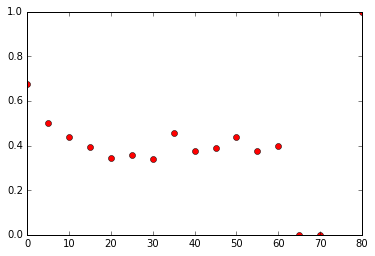

In [22]:
#We need to reduce the ages too:
survival_rate=[];
age_bins=[];
n=5;
for xx in range(0,20):
    y=0;
    z=0;
    for x in range(0,len(SA_train)):
        if SA_train.loc[x,'Age_Complete']>=n*xx and SA_train.loc[x,'Age_Complete']<n*(xx+1):
            if SA_train.loc[x,'Survived']==1:
                y=y+1
            z=z+1
    try:
        survival_rate.append(y/z);
        age_bins.append(n*xx);
    except:
        pass
plt.plot(age_bins,survival_rate,'ro')

In [23]:
#Suggests 0, 20, 60 as cut offs
test=pd.value_counts(SA_train[(SA_train['Age_Complete'] < 2)]['Survived'])
test[1]/(test[0]+test[1])

0.8571428571428571

In [24]:
test=pd.value_counts(SA_train[(SA_train['Age_Complete'] >= 2) & (SA_train['Age_Complete'] < 5)]['Survived'])
test[1]/(test[0]+test[1])

0.57692307692307687

In [25]:
test=pd.value_counts(SA_train[(SA_train['Age_Complete'] >= 5) & (SA_train['Age_Complete'] < 18)]['Survived'])
test[1]/(test[0]+test[1])

0.46575342465753422

In [26]:
test=pd.value_counts(SA_train[(SA_train['Age_Complete'] >= 18) & (SA_train['Age_Complete'] < 60)]['Survived'])
test[1]/(test[0]+test[1])

0.36436170212765956

In [27]:

test=pd.value_counts(SA_train[(SA_train['Age_Complete'] >= 60)]['Survived'])
test[1]/(test[0]+test[1])

0.26923076923076922

In [29]:
#decided to break ages differently after checking above:
SA_train['Age_Reduced']=4;
for x in range(0,len(SA_train)):
    if SA_train.loc[x,'Age_Complete']<2:
        SA_train.loc[x,'Age_Reduced']=0;
    elif SA_train.loc[x,'Age_Complete']<5:
        SA_train.loc[x,'Age_Reduced']=1;
    elif SA_train.loc[x,'Age_Complete']<18:
        SA_train.loc[x,'Age_Reduced']=2;
    elif SA_train.loc[x,'Age_Complete']<60:
        SA_train.loc[x,'Age_Reduced']=3;

In [30]:
#Now we make everything a number. Numbers are what our machine learning algorithm needs.
#starting with sex
# let women =0 and men=1
SA_train['Sex_Number']=SA_train['Sex'].map({'female':0, 'male':1}).astype(int)

In [31]:
#And Embarked location:
# let S =0, C=1, and Q=2
SA_train['Embarked_Number']=SA_train['Embarked_Complete'].map({'S':0, 'C':1,'Q':2}).astype(int)

In [32]:
#Finally, a different, slower loop for Cabin?:
SA_train['Cabin_Number']=1;
for x in range(0,len(SA_train)):
    if SA_train.loc[x,'Cabin?']=='No':
        SA_train.loc[x,'Cabin_Number']=0;

In [33]:
SA_train[['Survived','Pclass','Sex_Number','Fare_Reduced','Age_Reduced','Embarked_Number','Cabin_Number']].head()

,Survived,Pclass,Sex_Number,Fare_Reduced,Age_Reduced,Embarked_Number,Cabin_Number
0,0,3,1,0,3,0,0
1,1,1,0,2,3,1,1
2,1,3,0,0,3,0,0
3,1,1,0,2,3,0,1
4,0,3,1,0,3,0,0


In [34]:
SA_trainReduced=SA_train[['Survived','Pclass','Sex_Number','Fare_Reduced','Age_Reduced','Embarked_Number','Cabin_Number']]

In [35]:
#Think we're done?
#NOPE
#Still need to repeat it all for the test set:
SA_test=pd.read_csv('test.csv', header=0)

In [36]:
#Added problem of the missing fare in the test set:
SA_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
SA_test['Age_Complete']=SA_test['Age'];
SA_test['Age_Complete'].fillna(30,inplace = True);

In [38]:
SA_test['Embarked_Complete']=SA_test['Embarked'];
SA_test['Embarked_Complete'].fillna('S', inplace = True);

In [39]:
SA_test['Cabin?']=SA_test['Cabin'];
SA_test['Cabin?'].fillna('No', inplace = True);

In [40]:
SA_test['Fare'].fillna(SA_train['Fare'].mean(),inplace=True);

In [41]:
SA_test['Fare_Reduced']=2;
for x in range(0,len(SA_test)):
    if SA_test.loc[x,'Fare']<10:
        SA_test.loc[x,'Fare_Reduced']=0;
    elif SA_test.loc[x,'Fare']<50:
        SA_test.loc[x,'Fare_Reduced']=1

In [42]:
SA_test['Age_Reduced']=4;
for x in range(0,len(SA_test)):
    if SA_test.loc[x,'Age_Complete']<2:
        SA_test.loc[x,'Age_Reduced']=0;
    elif SA_test.loc[x,'Age_Complete']<5:
        SA_test.loc[x,'Age_Reduced']=1;
    elif SA_test.loc[x,'Age_Complete']<18:
        SA_test.loc[x,'Age_Reduced']=2;
    elif SA_test.loc[x,'Age_Complete']<60:
        SA_test.loc[x,'Age_Reduced']=3;

In [43]:
SA_test['Sex_Number']=SA_test['Sex'].map({'female':0, 'male':1}).astype(int)
SA_test['Embarked_Number']=SA_test['Embarked_Complete'].map({'S':0, 'C':1,'Q':2}).astype(int)
#Finally, a different, slower loop for Cabin?:
SA_test['Cabin_Number']=1;
for x in range(0,len(SA_test)):
    if SA_test.loc[x,'Cabin?']=='No':
        SA_test.loc[x,'Cabin_Number']=0;

In [44]:
SA_testReduced=SA_test[['Pclass','Sex_Number','Fare_Reduced','Age_Reduced','Embarked_Number','Cabin_Number']]

In [45]:
#Leaving Pandas to have simple arrays for machine learning algorithms.
train_data=SA_trainReduced.values

In [46]:
#Using machine learning package. Random forese--many subsets with n=100 people in each fitted,
#then all results from subsets combined.  
forest=RandomForestClassifier(n_estimators=100)
#Telling package to train with the first column as answer (survived), all other columns are features to use to make model.
forest=forest.fit(train_data[0::,1::],train_data[0::,0])
output=forest.predict(train_data[0::,1::])

In [47]:
#How well did we do? Comparing first 10 results to model:
print (output[0:10])
print (train_data[0:10,0])

[0 1 0 1 0 0 0 0 0 1]
[0 1 1 1 0 0 0 0 1 1]


In [48]:
#success rate of model compared to training set:
y=0
for x in range(0,len(output)):
    if output[x]==train_data[x,0]:
        y=y+1
print (1.*y/len(output))
#Note: this is not really how we should check our model.
#Really should break off ~20% of training set to use to verify model.
#training done on only the 80% left, leaving the verifying set untouched before being used to check.

0.8361391694725028


In [49]:
#Just a list of features in model, used later
features=['Pclass', 'Sex_Number', 'Fare_Reduced', 'Age_Reduced',
       'Embarked_Number', 'Cabin_Number'];

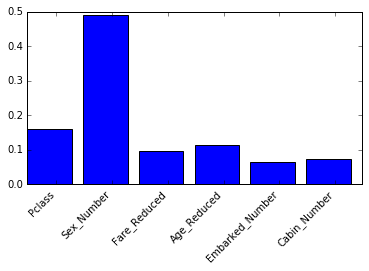

In [50]:
#This uses the machine learning package to determine which features are most important to our algorithm.
horizontal=[]
for x in range(0,len(features)):
    horizontal.append(x);
importance=forest.feature_importances_;

plt.figure(1)
h = plt.bar(horizontal, importance, label=features);
plt.subplots_adjust(bottom=0.3);
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h];
plt.xticks(xticks_pos, features,  ha='right', rotation=45);

In [ ]:
#Now we enter the section where I practice with xgboost for the first time.

In [61]:
train_X=SA_trainReduced.iloc[:,1:].as_matrix()
train_Y=SA_trainReduced.iloc[:,0]

In [ ]:
train_X = big_X_imputed[0:train_df.shape[0]].as_matrix()
test_X = big_X_imputed[train_df.shape[0]::].as_matrix()
train_y = train_df['Survived']

In [64]:
multi:softprob
    'binary:logistic'

In [116]:
gbm = xgb.XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.01,
                       min_child_weight=1, gamma=5,reg_lambda=5,
                       objective= 'binary:logistic').fit(train_X, train_Y)

In [108]:
predictions = gbm.predict(train_X)

In [109]:
#success rate of model compared to training set:
y=0
for x in range(0,len(predictions)):
    if predictions[x]==train_Y[0]:
        y=y+1
print (1.*y/len(output))

0.7407407407407407


In [52]:
#And can use the learned model to predict on test data:
test_data=SA_testReduced.values

In [53]:
titanic_predictions=forest.predict(test_data)

In [54]:
IDs=SA_test['PassengerId']

In [55]:
Titanic=np.c_[IDs,titanic_predictions]

In [56]:
#np.savetxt("titanic_predictions.csv", Titanic, delimiter=",")
#Success rate: .75

In [140]:
#We can also now move onto other ways to predict. Let's try logistic regression:

In [57]:
#To do that, first we need to change out inputs into long vectors:
Ypart=train_data[:,0]
Xpart=train_data[:,1:]

In [58]:
np.transpose(Xpart)

array([[3, 1, 3, ..., 3, 1, 3],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 2, 0, ..., 1, 1, 0],
       [3, 3, 3, ..., 3, 3, 3],
       [0, 1, 0, ..., 0, 1, 2],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int64)

In [59]:
Features=SA_trainReduced.iloc[:,1:].columns.values

In [60]:
#First we find out how large of a vector each passanager will be:
y=0;
for x in range(0,len(Features)):
    y=y+len(SA_trainReduced[Features[x]].unique())
print (y)

18


In [62]:
#Now make an array for each feature
Xs=[];
for z in range(0,len(Features)):
    Xvector=np.zeros((len(SA_trainReduced),len(SA_trainReduced[Features[z]].unique())))
    #print(   Xvector[0]  )
    subFeatures=np.sort(SA_trainReduced[Features[z]].unique())
    #print( subFeatures)
    subFeatureDic={};
    for x in range(0,len(subFeatures)):
        subFeatureDic[subFeatures[x]]=[x]
    #print ( subFeatureDic)
    y=0;
    for xx in range(0,len(Xvector)):
        Xvector[xx,subFeatureDic[SA_trainReduced[Features[z]][xx]][0]]=1
    #print (Xvector[0:5])
    Xs.append(Xvector)

In [63]:
FeatureVectors=Xs[0];
for x in range(1,len(Features)):
    FeatureVectors=np.c_[FeatureVectors,Xs[x]]

In [64]:
Y=np.zeros((len(SA_train),2))

In [65]:
for x in range(0,len(Y)):
    Y[x,Ypart[x]]=1

In [66]:
Y

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

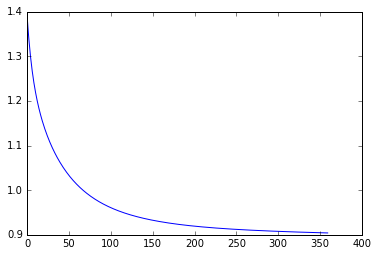

In [67]:
Xtest=FeatureVectors;
Ytest=Y;
Costfunctions=[];
Thetatest=np.asmatrix(np.random.rand(Xtest[0].size,Ytest[0].size)/100.)
m=len(Xtest);
#m=10;
for k in range(0,3000):
    z2=Xtest[0:m]*Thetatest
    a2=1./(1.+np.exp(-z2));
    J=-1./m*(np.sum(np.multiply(Ytest[0:m],np.log(a2))+np.multiply(1-Ytest[0:m],np.log(1-a2))))
    alpha=.1;
    Thetatest=Thetatest-alpha/m*(((a2-Ytest[0:m]).transpose()*Xtest[0:m]).transpose())
    Costfunctions.append(J);
    try:
        if (Costfunctions[-2]-Costfunctions[-1])<.00005:
            break
    except:
        pass
plt.plot(Costfunctions)
    #z2cv=Xcv[0:mcv]*Thetatest
    #a2cv=1./(1.+np.exp(-z2cv));
    #Jcv=-1./mcv*(np.sum(np.multiply(Ycv[0:mcv],np.log(a2cv))+np.multiply(1-Ycv[0:mcv],np.log(1-a2cv))))
    #PredictedScoreT=-1./m*(np.sum(np.multiply(Ytest[0:m],np.log(a2))));
    #PredictedScoreCV=-1./mcv*(np.sum(np.multiply(Ycv[0:mcv],np.log(a2cv))));
    #return Thetatest,a2, Costfunctions, a2cv, Jcv,PredictedScoreT,PredictedScoreCV

In [69]:
test=1./(1.+np.exp(-FeatureVectors*Thetatest))

In [367]:
test[0].max()

0.91224228419554887

In [72]:
test=a2==np.max(a2,axis=1);
test2=test.astype(int);

In [369]:
test2

matrix([[1, 0],
        [0, 1],
        [1, 0],
        ..., 
        [0, 1],
        [1, 0],
        [1, 0]])

In [70]:
solutions=np.zeros((len(test),1))

In [73]:
for x in range(0,len(test2)):
    if test2[x,1]==1:
        solutions[x]=1

In [74]:
LogisticPredictions=solutions

In [75]:
y=0
for x in range(0,len(Ypart)):
    if Ypart[x]==LogisticPredictions[x]:
        y=y+1
print (y/len(Ypart))

0.7957351290684624


In [ ]:
#Ok, but Logistic Regression can't create new variables for you. So, let's make up some more.

In [79]:
SA_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Complete',
       'Embarked_Complete', 'Cabin?', 'Fare_Reduced', 'Age_Reduced',
       'Sex_Number', 'Embarked_Number', 'Cabin_Number'], dtype=object)

In [84]:
SA_train[['Sex','Sex_Number','Pclass']].head(3)

,Sex,Sex_Number,Pclass
0,male,1,3
1,female,0,1
2,female,0,3


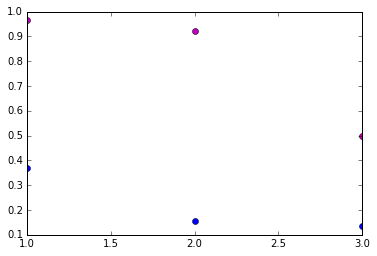

In [173]:
#First compound variable: sex and class:
Class=[];
SurvivalRate=[];
x=0;
y=0;
z=0;
for sex in range(0,2):
    subClass=[];
    subSurvivalRate=[];
    for C in range(1,4):
        test=pd.value_counts(SA_train[(SA_train['Sex_Number']==sex) & (SA_train['Pclass']==C)]['Survived']);
        try:
            test2=1.*test[1]/(test[0]+test[1]);
        except:
            test2=1.;
#        try:
#            test3=test[0]+test[1];
#        except:
#            test3=test.values[0];
        subClass.append(C);
        subSurvivalRate.append(test2)
    Class.append(subClass);
    SurvivalRate.append(subSurvivalRate);
#print ('survival rate of %s out of %s' % (test2,test3))
plt.plot(Class[0],SurvivalRate[0],'mo',Class[1],SurvivalRate[1],'bo');

In [ ]:
#Over 90% survival for women in classes 1 and 2. 
#Only 16% survival or less for men in class 3 and 2.
#

In [179]:
#SA_train[(SA_train['Age_Complete'] >= 18) & (SA_train['Age_Complete'] < 60)]['Survived'])
test=pd.value_counts(SA_train[(SA_train['Sex_Number']==0) & (SA_train['Age_Reduced']==2)]['Survived']);
try:
    test2=1.*test[1]/(test[0]+test[1]);
except:
    test2=1.;
try:
    test3=test[0]+test[1];
except:
    test3=test.values[0];
#test2=2
print ('survival rate of %s out of %s' % (test2,test3))

survival rate of 0.684210526316 out of 38


In [175]:
SA_train['Age_Reduced'].unique()

array([3, 1, 2, 4, 0], dtype=int64)

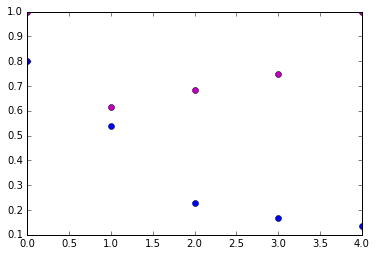

In [210]:
#Look at other variables:
AgeReduced=[];
SurvivalRate=[];
x=0;
y=0;
z=0;
for sex in range(0,2):
    subAge=[];
    subSurvivalRate=[];
    for C in range(0,5):
        test=pd.value_counts(SA_train[(SA_train['Sex_Number']==sex) & (SA_train['Age_Reduced']==C)]['Survived']);
        try:
            test2=1.*test[1]/(test[0]+test[1]);
        except:
            test2=1.;
        try:
            test3=test[0]+test[1];
        except:
            test3=test.values[0];
        subAge.append(C);
        subSurvivalRate.append(test2)
        #print ('survival rate of %s out of %s' % (test2,test3))
    AgeReduced.append(subAge);
    SurvivalRate.append(subSurvivalRate);
    
plt.plot(AgeReduced[0],SurvivalRate[0],'mo',AgeReduced[1],SurvivalRate[1],'bo');

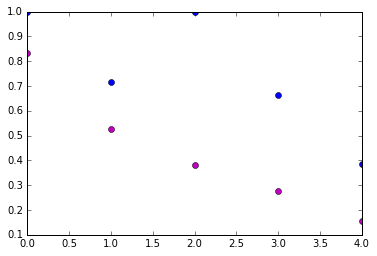

In [188]:
#Look at other variables:
AgeReduced=[];
SurvivalRate=[];
x=0;
y=0;
z=0;
for cab in range(0,2):
    subAge=[];
    subSurvivalRate=[];
    for C in range(0,5):
        test=pd.value_counts(SA_train[(SA_train['Cabin_Number']==cab) & (SA_train['Age_Reduced']==C)]['Survived']);
        try:
            test2=1.*test[1]/(test[0]+test[1]);
        except:
            test2=1.;
#        try:
#            test3=test[0]+test[1];
#        except:
#            test3=test.values[0];
        subAge.append(C);
        subSurvivalRate.append(test2)
    AgeReduced.append(subAge);
    SurvivalRate.append(subSurvivalRate);
#print ('survival rate of %s out of %s' % (test2,test3))
plt.plot(AgeReduced[0],SurvivalRate[0],'mo',AgeReduced[1],SurvivalRate[1],'bo');

In [191]:
#I wonder if Cabin and Class are related:
pd.value_counts(SA_train[SA_train['Cabin_Number']==1]['Survived'])

1    136
0     68
Name: Survived, dtype: int64

In [205]:
#Try to make this visualization a bit better for doing K-means grouping later
#first, those that survived:
SS=SA_train[SA_train['Survived']==1]['Fare']
SC=SA_train[SA_train['Survived']==1]['Age_Complete']
DS=SA_train[SA_train['Survived']==0]['Fare']
DC=SA_train[SA_train['Survived']==0]['Age_Complete']

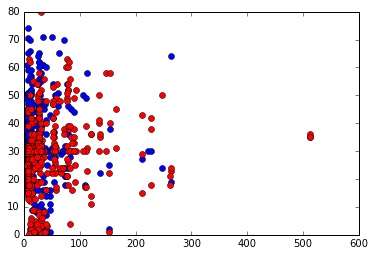

In [207]:
plt.plot(DS,DC,'bo',SS,SC,'ro')

In [245]:
SA_train['Sex_and_Class']=0;
num=0;
for x in range(0,len(SA_train['Sex_Number'].unique())):
    for y in range(0,len(SA_train['Pclass'].unique())):
        SA_train.ix[(SA_train['Sex_Number']==x)&(SA_train['Pclass']==y+1),'Sex_and_Class']=num
        num=num+1

In [246]:
for x in range(0,len(SA_train['Sex_and_Class'].unique())):
    test=pd.value_counts(SA_train[SA_train['Sex_and_Class']==x]['Survived'])
    try:
        test2=1.*test[1]/(test[0]+test[1]);
    except:
        test2=1.;
#        try:
#            test3=test[0]+test[1];
#        except:
#            test3=test.values[0];
    print (test2)

0.968085106383
0.921052631579
0.5
0.368852459016
0.157407407407
0.135446685879


In [244]:
SA_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)